# Simple Network

## Import Library

importing Jupyter notebook from /Users/errasi/python_workspace/DeepLearning_workspace/Ch4/../Ch2_3/handWrittenDigit.ipynb
importing Jupyter notebook from /Users/errasi/python_workspace/DeepLearning_workspace/Ch4/../Ch2_3/activation_function.ipynb


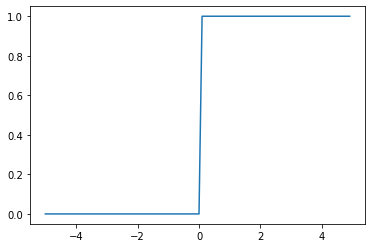

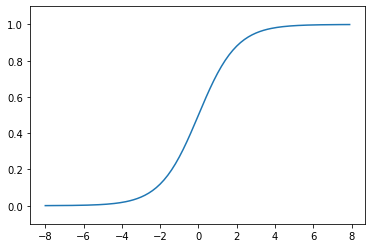

[0.33098211 0.72778046]
[0.01821127 0.24519181 0.73659691]
1.0
(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)
Accuracy:0.9352
importing Jupyter notebook from /Users/errasi/python_workspace/DeepLearning_workspace/Ch4/../Ch4/load_error.ipynb
answer : 7
[8.4412488e-05 2.6350631e-06 7.1549421e-04 1.2586256e-03 1.1727954e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744702e-06 8.1831159e-04]
answer : 2
[4.8363311e-03 1.1045857e-03 9.4425237e-01 1.4309139e-02 5.6989512e-07
 6.6760429e-03 2.7533356e-02 1.2708423e-06 1.2864231e-03 4.7864624e-08]
1st error : 5.694565033415752e-06
2nd error : 0.002070734925835676
{2nd error} over {1st error} : 363.6335547464271


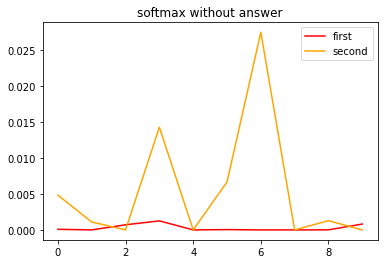

1st error : 0.00293918838724494
2nd error : 0.05736168101429939
{2nd error} over {1st error} : 19.516163463093836


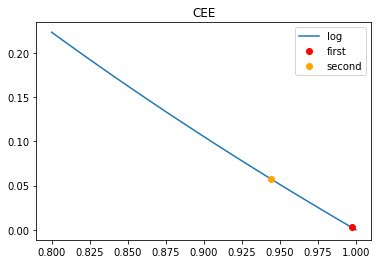

(60000, 784)
(60000, 10)
size of y : (10, 10)
0 th predict : 7
0 th answer  : 7
1 th predict : 0
1 th answer  : 0
2 th predict : 5
2 th answer  : 5
3 th predict : 4
3 th answer  : 4
4 th predict : 2
4 th answer  : 2
5 th predict : 9
5 th answer  : 4
6 th predict : 3
6 th answer  : 3
7 th predict : 5
7 th answer  : 5
8 th predict : 3
8 th answer  : 3
9 th predict : 6
9 th answer  : 6
CEE for Batch : 0.14601332798993036
importing Jupyter notebook from /Users/errasi/python_workspace/DeepLearning_workspace/Ch4/../Ch4/gradient.ipynb


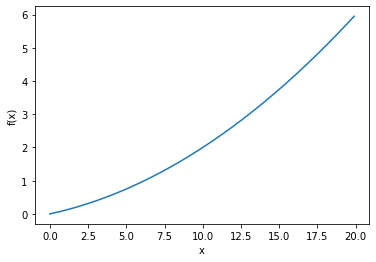

x=5 일 때 해석 미분 값 : 0.2
x=5 일 때 수치 미분 값 : 0.1999999999990898
반올림 오차 수치 미분 값 : 0.0
x=10 일 때 해석 미분 값 : 0.3
x=10 일 때 수치 미분 값 : 0.2999999999986347
반올림 오차 수치 미분 값 : 0.0


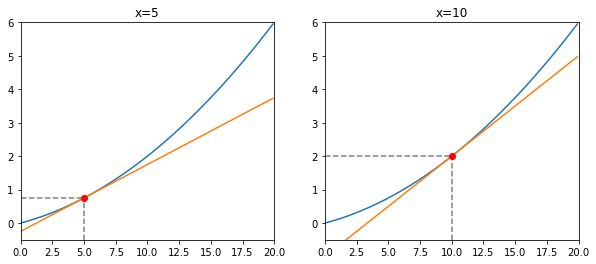

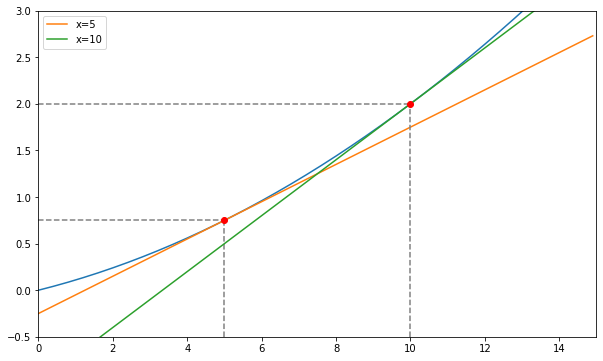

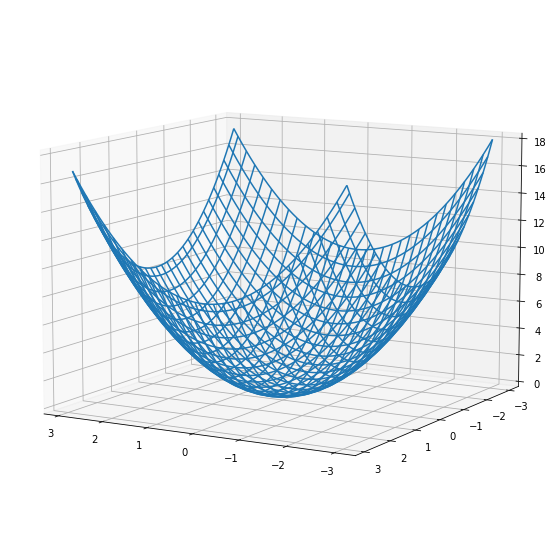

x0에 대한 편미분 : 6.00000000000378
x1에 대한 편미분 : 7.999999999999119
[6. 8.]
[[2. 4. 6.]
 [0. 4. 8.]]
[6. 0.]


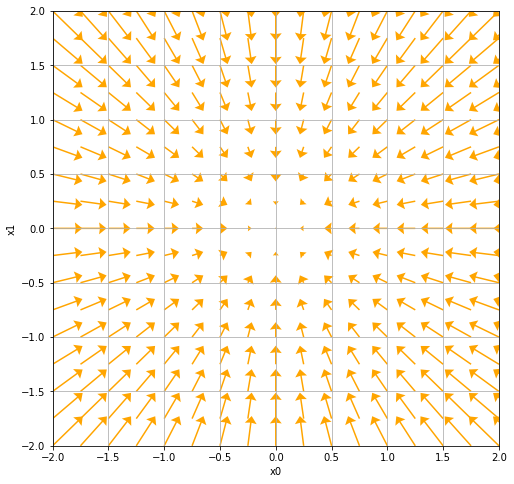

learning rate 0.1   :  [-6.11110793e-10  8.14814391e-10]
learning rate 10    :  [-2.58983747e+13 -1.29524862e+12]
learning rate 1e-10 :  [-2.99999994  3.99999992]


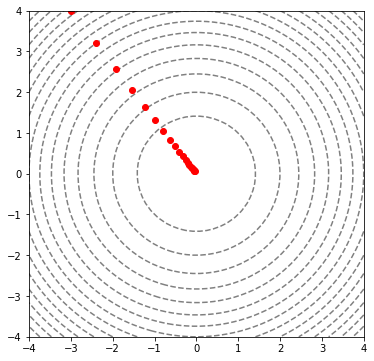

In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
# from PIL import Image
# import pickle
import import_ipynb
sys.path.append(os.pardir)
from DataSet.mnist import load_mnist
from Ch2_3.handWrittenDigit import get_data, init_network, predict, img_show
from Ch2_3.activation_function import softmax, sigmoid
from Ch4.load_error import cross_entropy_error
from Ch4.gradient import numerical_gradient

## Define Simple Network

In [3]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [4]:
net = simpleNet()
print(net.W)

[[ 0.94576733 -0.34840917  1.04366546]
 [ 0.88552775  1.00991954 -0.90467686]]


In [5]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(softmax(p))

[0.5792961  0.29804976 0.12265413]


In [6]:
print(np.argmax(p))
t = np.array([1,0,0])
print(net.loss(x,t))

0
0.5459415302241557


In [7]:
def f(W):
    return net.loss(x,t)

In [8]:
dW = numerical_gradient(f,net.W)
print(dW)

[[-0.25242234  0.17882986  0.07359248]
 [-0.37863351  0.26824479  0.11038872]]


In [9]:
net.W[0][0]-=0.1*dW[0][0]
print(net.loss(x,t))

0.5395977553831589


## 2 Layer Network

In [10]:
class TwoLayerNet:
    def __init__(self,input_size, hidden_size, output_size,\
        weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

## Mini Batch

In [66]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True,one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
iter_per_epoch = max(train_size / batch_size, 1)


In [67]:
t_train = np.array(t_train)
t_train = t_train[:,0]
print(t_train)
print(np.invert(t_train))
# t_train = np.concatenate((t_train,2+np.invert(t_train)),axis=0)

[0. 1. 0. ... 0. 0. 0.]


TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
print(train_size)
print(t_test.shape)

60000
(10000, 10)


In [14]:

# 차분 계산은 loop 한번에 45초
# 100번에 1시간 15분
# 1000번에 12시간 30분
# 10000번에 125시간

X = []
Y = []
plt.figure()
for i in range(iters_num):
    # step 1 : Mini Batch training
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # step 2 : Gradient
    grad = network.numerical_gradient(x_batch,t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # step 3 : update parameter
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
        
    # step 4 : record history & back to step 1
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    X.append(i)
    Y.append(loss)
    plt.plot(X,Y,'-r')
    plt.show()
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc)+\
            ', '+str(test_acc))

Traceback (most recent call last):
  File "<string>", line 1, in <module>
KeyboardInterrupt


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
a=[]
b=[]
for i in range(10):
    a.append(i)
    b.append(i*i)
    plt.plot(a,b,'r-')
    plt.show()